# INFORME DE ANÁLISIS DE EXPLORATORIO DE SOBRE DATOS CLÍNICOS DE PACIENTES DIABETES

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recargar el archivo con el delimitador correcto
df = pd.read_csv('/content/diabetes_dataset_with_notes.csv', delimiter=';')

# Mostrar las primeras filas para entender la estructura del archivo
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Limpieza de datos: Eliminar filas con valores nulos
df_cleaned = df.dropna()

# Análisis inicial
print(df.head())
print(df.info())
print(df.describe())

# Limpieza de datos
df = df.dropna()  # Eliminar filas con valores faltantes

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
clinical_notes          0
dtype: int64
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0 

# ENTRENAMIENTO RED NEURONAL CLUSTERING CON K-MEANS:

---



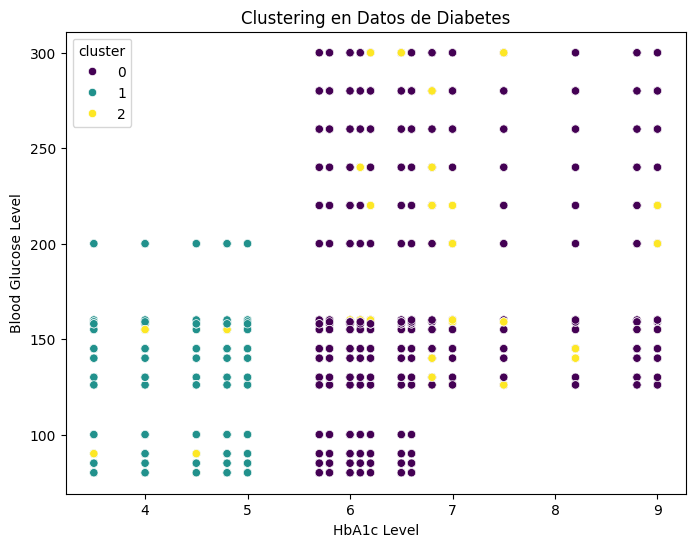

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9187 - loss: 0.2008 - val_accuracy: 0.9607 - val_loss: 0.1175
Epoch 2/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9667 - loss: 0.1094 - val_accuracy: 0.9650 - val_loss: 0.1073
Epoch 3/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9673 - loss: 0.1048 - val_accuracy: 0.9681 - val_loss: 0.1025
Epoch 4/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9701 - loss: 0.0975 - val_accuracy: 0.9696 - val_loss: 0.0974
Epoch 5/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9716 - loss: 0.0934 - val_accuracy: 0.9704 - val_loss: 0.0955
Epoch 6/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9724 - loss: 0.0910 - val_accuracy: 0.9704 - val_loss: 0.0934
Epoch 7/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9718 - loss: 0.0910 - val_accuracy: 0.9707 - val_loss: 0.0936
Epoch 8/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9717 - loss: 0.0912 - val

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar datos
df = pd.read_csv("/content/diabetes_dataset_with_notes.csv")

# Seleccionar características relevantes
features = ['bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
X = df[features]
y = df['diabetes']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering con K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['hbA1c_level'], y=df['blood_glucose_level'], hue=df['cluster'], palette='viridis')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Clustering en Datos de Diabetes')
plt.show()

# Construcción de la red neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(len(features),)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento
y = np.array(y)
model.fit(X_scaled, y, epochs=50, batch_size=10, validation_split=0.2)

# Evaluación
loss, accuracy = model.evaluate(X_scaled, y)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


# Agrupamiento de K-Means en datos de digitos

---



Primeras filas del dataset:
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  \
0           never  27.32    

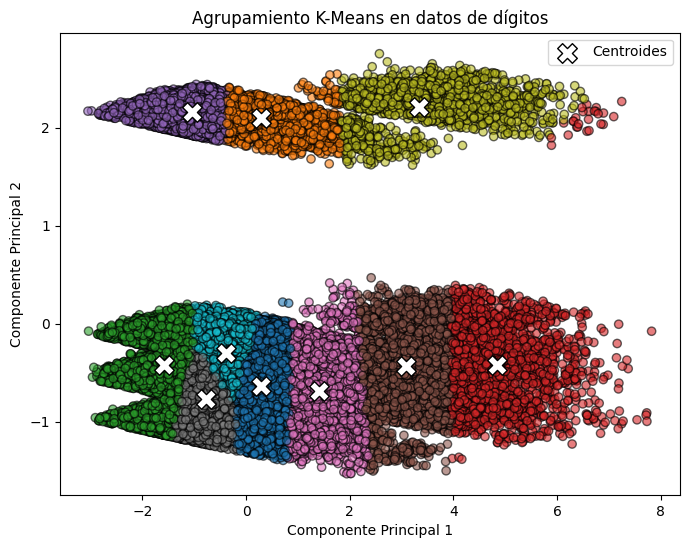

Distribución de clusters:
Cluster
0    19192
9    17536
7    15951
2    13542
4     9277
1     8780
6     6725
5     4354
3     2503
8     2140
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar los datos
data_path ="/content/diabetes_dataset_with_notes.csv"

# The delimiter was likely incorrect. Trying with comma delimiter instead of the default.
df = pd.read_csv(data_path, delimiter=';') # Changed the delimiter to ','

# Previsualizar los datos
print("Primeras filas del dataset:")
print(df.head())

# Seleccionar características numéricas para el clustering (excluyendo columnas con texto si las hay)
numeric_columns = df.select_dtypes(include=[np.number]).columns
data = df[numeric_columns].dropna()

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicar K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Agregar etiquetas al dataframe
df['Cluster'] = labels

# Visualizar los clusters en dos dimensiones
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='tab10', edgecolors='k', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='white', edgecolors='k', marker='X', s=200, label='Centroides')
plt.title("Agrupamiento K-Means en datos de dígitos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Mostrar cuántos elementos hay en cada cluster
print("Distribución de clusters:")
print(df['Cluster'].value_counts())

# K-Means++ Inicialización

---



Primeras filas del dataset:
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  \
0           never  27.32    

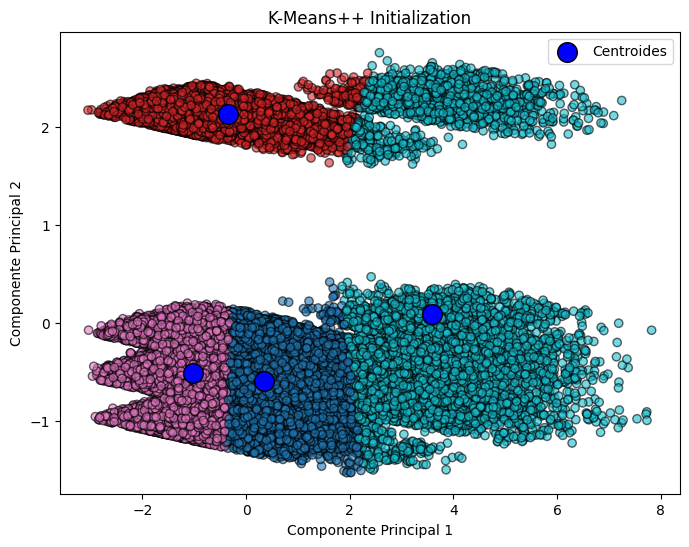

Distribución de clusters:
Cluster
2    38090
0    34295
1    18363
3     9252
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar los datos
data_path = "/content/diabetes_dataset_with_notes.csv"
df = pd.read_csv(data_path, delimiter=';') # Added delimiter=';'

# Previsualizar los datos
print("Primeras filas del dataset:")
print(df.head())

# Seleccionar características numéricas para el clustering (excluyendo columnas con texto si las hay)
numeric_columns = df.select_dtypes(include=[np.number]).columns
data = df[numeric_columns].dropna()

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicar K-Means con inicialización K-Means++
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Agregar etiquetas al dataframe
df['Cluster'] = labels # Adding the 'Cluster' column to the dataframe

# Visualizar los clusters y los centroides
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='tab10', edgecolors='k', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', edgecolors='k', marker='o', s=200, label='Centroides')
plt.title("K-Means++ Initialization")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Mostrar cuántos elementos hay en cada cluster
print("Distribución de clusters:")
print(df['Cluster'].value_counts())

# h

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation

# Cargar los datos
data_path = "/content/diabetes_dataset_with_notes.csv"
df = pd.read_csv(data_path, delimiter=';') # Added delimiter to handle semicolon separated files

# Previsualizar los datos
print("Primeras filas del dataset:")
print(df.head())

# Seleccionar características numéricas para el clustering (excluyendo columnas con texto si las hay)
numeric_columns = df.select_dtypes(include=[np.number]).columns
data = df[numeric_columns].dropna()

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
labels = affinity_propagation.fit_predict(data_pca)
cluster_centers = affinity_propagation.cluster_centers_

# Visualizar los clusters
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Affinity Propagation Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Mostrar número de clusters identificados
num_clusters = len(np.unique(labels))
print(f"Número estimado de clusters: {num_clusters}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetes_dataset_with_notes.csv'

# Demostración de los supuestos de k-Means:

 1. Mezcla de manchas gaussianas
 2. Varianza desigual
 3. Manchas Distribuidas Anisotrópicamente
 4. Sangre de tamaño desigual

---



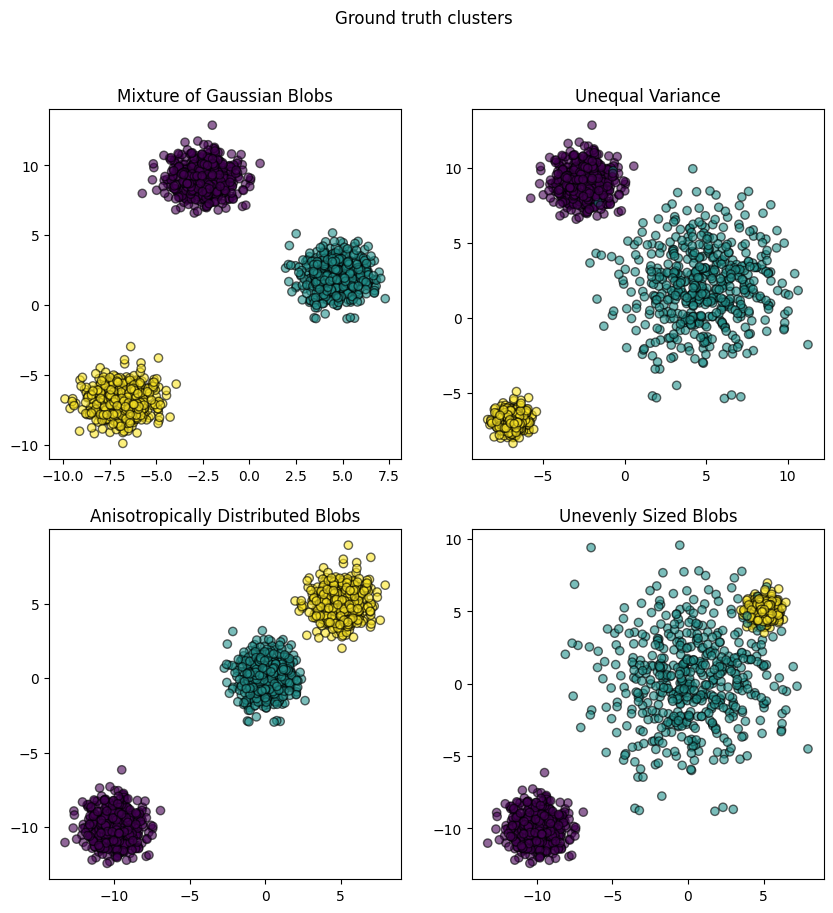

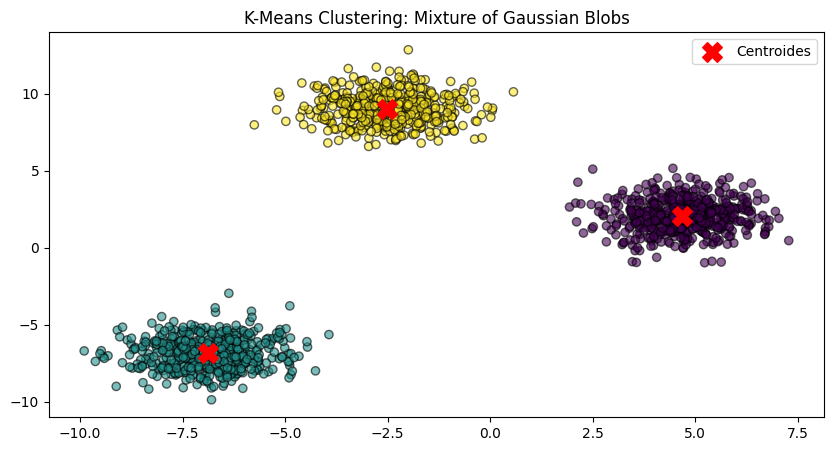

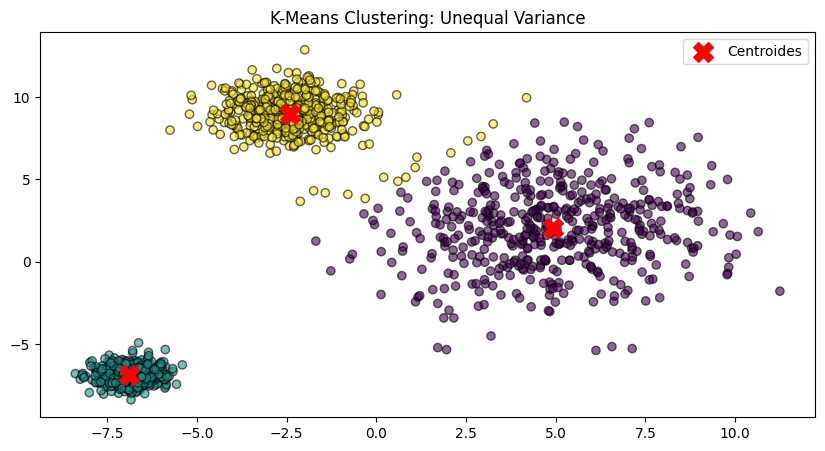

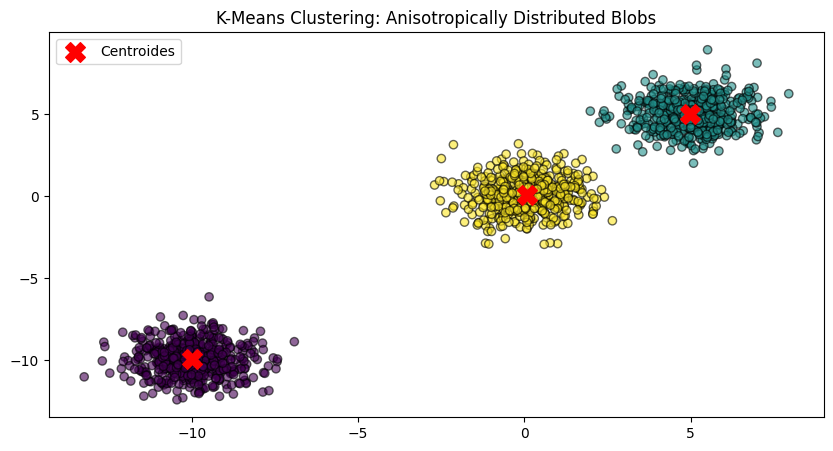

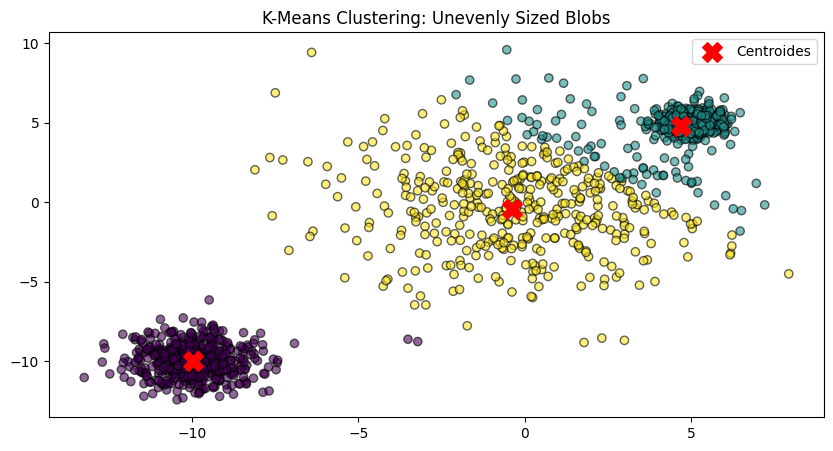

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generar datos sintéticos con diferentes distribuciones
n_samples = 1500
random_state = 42
X1, y1 = make_blobs(n_samples=n_samples, random_state=random_state)
X2, y2 = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X3, y3 = make_blobs(n_samples=n_samples, centers=[(-10, -10), (0, 0), (5, 5)], random_state=random_state)
X4, y4 = make_blobs(n_samples=n_samples, centers=[(-10, -10), (0, 0), (5, 5)], cluster_std=[1.0, 3.0, 0.5], random_state=random_state)

# Función para visualizar las distribuciones de datos
def plot_datasets(datasets, titles):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()
    for i, (X, y, title) in enumerate(zip(datasets, [y1, y2, y3, y4], titles)):
        axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.6)
        axes[i].set_title(title)
    plt.suptitle("Ground truth clusters")
    plt.show()

# Mostrar las distribuciones de datos
datasets = [X1, X2, X3, X4]
titles = ["Mixture of Gaussian Blobs", "Unequal Variance", "Anisotropically Distributed Blobs", "Unevenly Sized Blobs"]
plot_datasets(datasets, titles)

# Aplicar K-Means a los conjuntos de datos y visualizar los resultados
for i, X in enumerate(datasets):
    kmeans = KMeans(n_clusters=3, random_state=random_state)
    labels = kmeans.fit_predict(X)
    plt.figure(figsize=(10, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
    plt.title(f"K-Means Clustering: {titles[i]}")
    plt.legend()
    plt.show()